In [128]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')  
data = data[['price', 'market_cap', 'total_volume']] 
data = data.fillna(data.mean())
# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Создание временных окон для обучения
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length-10):
        X.append(data[i:i+sequence_length])
        y.append(data[i + sequence_length+5, 0])
    return np.array(X), np.array(y)

sequence_length = 30 
X, y = create_dataset(scaled_data, sequence_length)

# 4. Разделение данных на обучающие и тестовые выборки
split = int(len(X) * 0.8)  # 80% данных на обучение, 20% на тест
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Построение модели LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)  # Выходной слой для предсказания цены
])

model.compile(optimizer='nadam', loss='mean_squared_error')

# 6. Обучение модели
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


D:\crypto_plot\env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0192 - val_loss: 0.0025
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0014 - val_

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


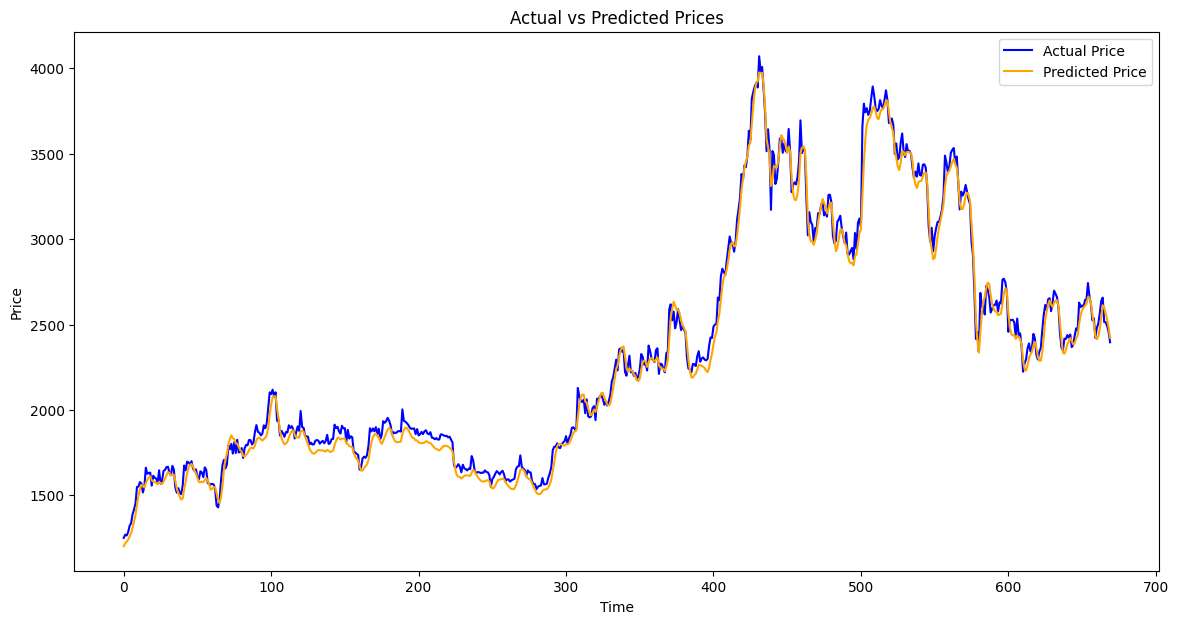

In [129]:
# 7. Предсказание цен
y_pred = model.predict(X_test)

# 8. Обратное масштабирование для интерпретации предсказанных и истинных значений
x_test_rescaled = scaler.inverse_transform(np.c_[X_test[:,-1], np.zeros((len(X_test[:,-1]), 0))])[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.c_[y_pred, np.zeros((len(y_pred), 2))])[:, 0]

# 9. Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Actual Price', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
